# New York EDA

This notebook is a simple EDA of emissions data from NY.

In [1]:
# load in packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [ ]:
# Load in the annual emissions data for NY: 
ny_emissions = pd.read_csv('data/AnnualEmissions_NY.csv')
ny_emissions.head()

,Year,Source Name,ORIS Code,Unit ID,State,State Identifier,Control Period,Op Time,Op Hours,CO2 Mass (Tons),Heat Input (mmBtu),Eligible Biomass (Tons) (State Value),Eligible CHP Thermal Output (Tons) (State Value),Reporting Status
0,2009,Danskammer Generating Station,2480,"1, 2, 3, 4",NY,3334600011,01/01/2009 - 12/31/2011,"14,834.26","14,908","2,130,336.381","20,877,010",0.000,0.0,Complete
1,2010,Danskammer Generating Station,2480,"1, 2, 3, 4",NY,3334600011,01/01/2009 - 12/31/2011,"12,875.00","12,970","1,775,864.634","17,411,734",0.000,0.0,Complete
2,2011,Danskammer Generating Station,2480,"1, 2, 3, 4",NY,3334600011,01/01/2009 - 12/31/2011,"8,352.26","8,465","969,307.181","9,571,900",0.000,0.0,Complete
3,2012,Danskammer Generating Station,2480,"1, 2, 3, 4",NY,3334600011,01/01/2012 - 12/31/2014,"3,611.77","3,712","331,982.554","3,365,696",0.000,0.0,Complete
4,2013,Danskammer Generating Station,2480,"1, 2, 3, 4",NY,3334600011,01/01/2012 - 12/31/2014,0.00,0,0.000,0,0.000,0.0,Complete


In [ ]:
# Do some data cleaning: remove commas and cast as floats:

def clean_column(text:str) -> float:
    if type(text) != str:
        return text
    else:
        return float(text.replace(',','')) # removes comma and converts to float

ny_emissions['Op Time'] = ny_emissions['Op Time'].apply(clean_column)
ny_emissions['Op Hours'] = ny_emissions['Op Hours'].apply(clean_column)
ny_emissions['CO2 Mass (Tons)'] = ny_emissions['CO2 Mass (Tons)'].apply(clean_column)
ny_emissions['Heat Input (mmBtu)'] = ny_emissions['Heat Input (mmBtu)'].apply(clean_column)
ny_emissions['Eligible Biomass (Tons) (State Value)'] = ny_emissions['Eligible Biomass (Tons) (State Value)'].apply(clean_column)
ny_emissions['Eligible CHP Thermal Output (Tons) (State Value)'] = ny_emissions['Eligible CHP Thermal Output (Tons) (State Value)'].apply(clean_column)

ny_emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 14 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Year                                              1225 non-null   int64  
 1   Source Name                                       1225 non-null   object 
 2   ORIS Code                                         1225 non-null   int64  
 3   Unit ID                                           1225 non-null   object 
 4   State                                             1225 non-null   object 
 5   State Identifier                                  1225 non-null   int64  
 6   Control Period                                    1225 non-null   object 
 7   Op Time                                           1225 non-null   float64
 8   Op Hours                                          1225 non-null   float64
 9   CO2 Mass (Tons)    

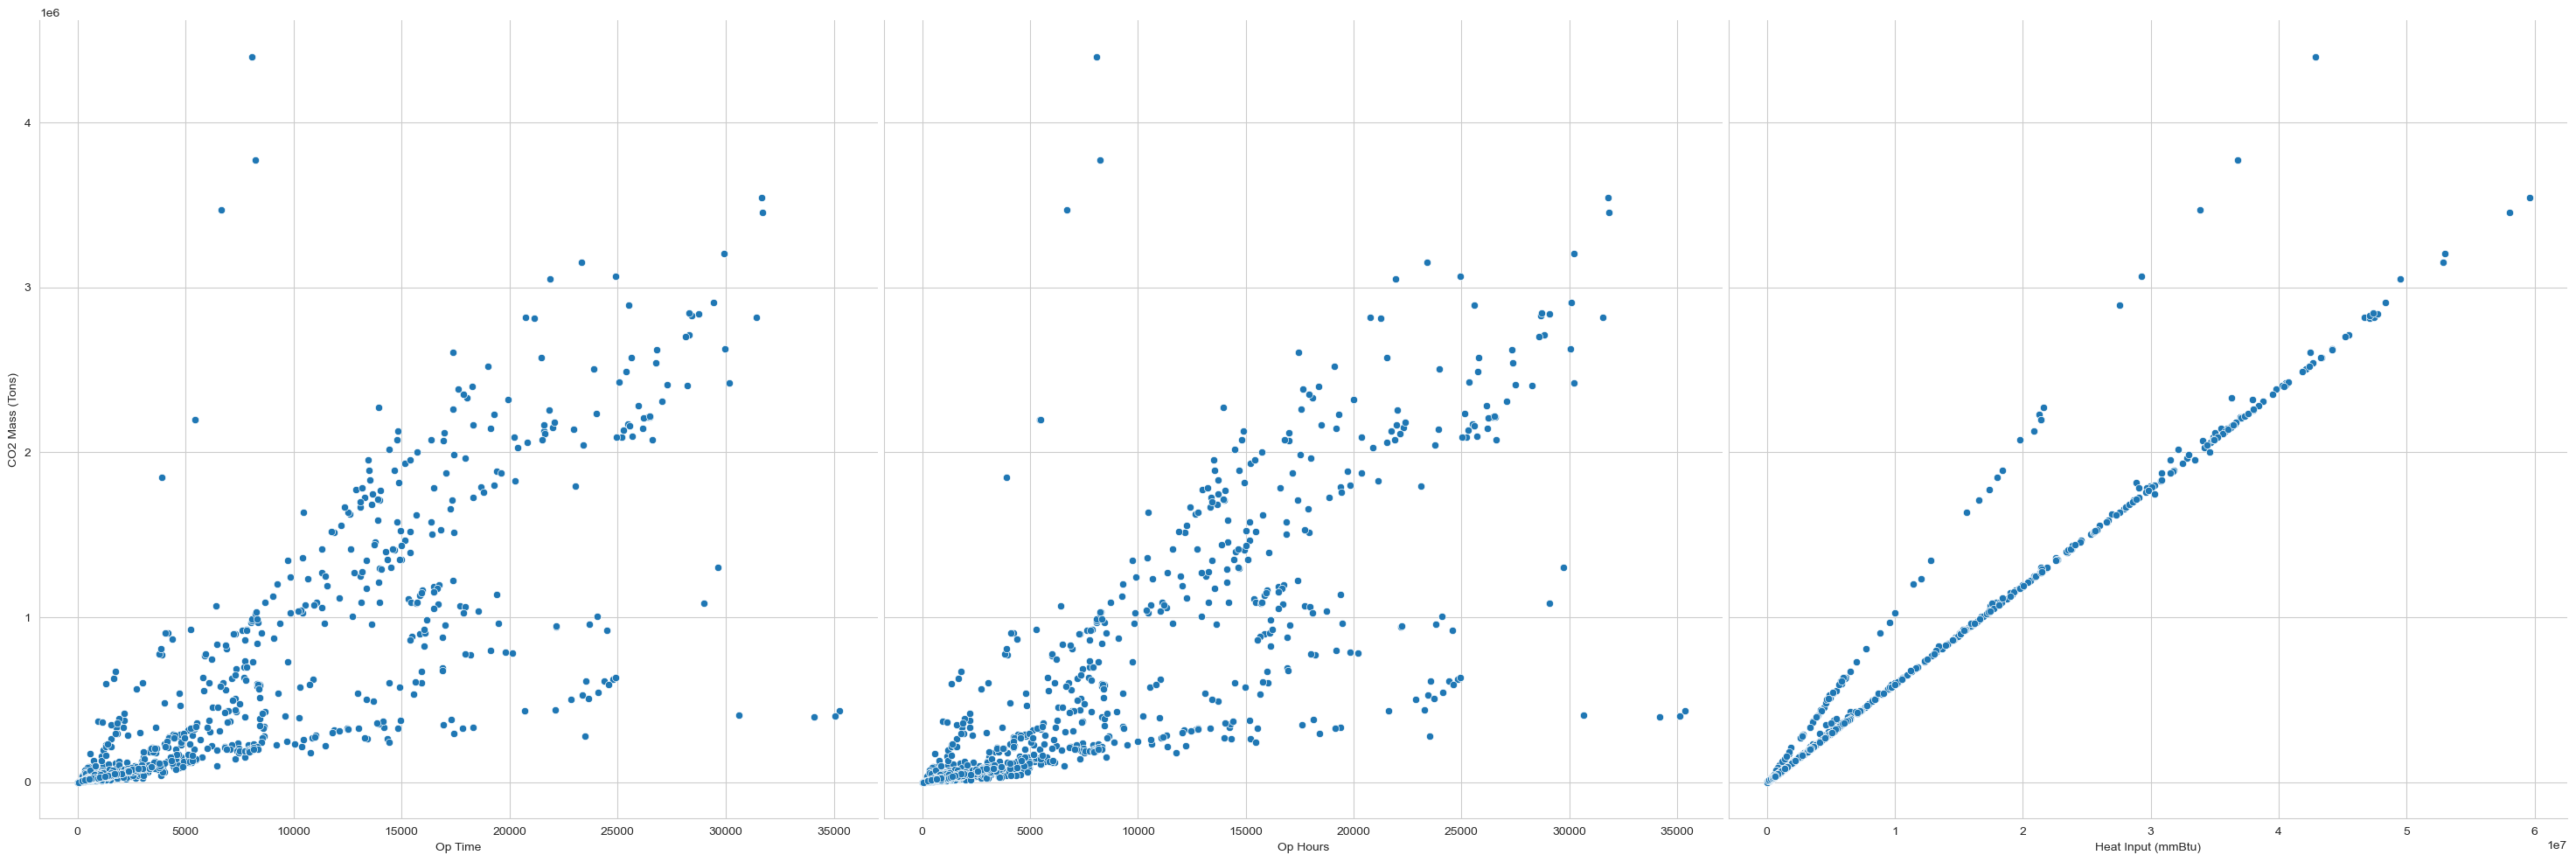

In [ ]:
# Plot the quantative features against emissions to get a visual picture of which may be related

quant_features = ['CO2 Mass (Tons)', 'Op Time', 'Op Hours', 'Heat Input (mmBtu)']

sns.pairplot(ny_emissions,
                y_vars = quant_features[0],
                x_vars = quant_features[1:],
                height = 10,
                diag_kind = None)


<Axes: xlabel='Heat Input (mmBtu)', ylabel='CO2 Mass (Tons)'>

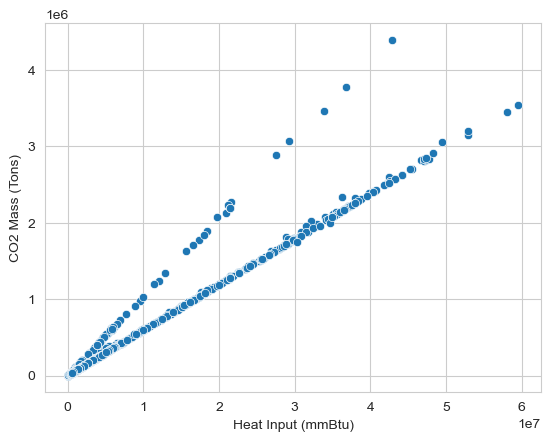

In [ ]:
# Focus on plot of CO2 emissions against heat input

sns.scatterplot(data=ny_emissions, x='Heat Input (mmBtu)', y='CO2 Mass (Tons)')

In [ ]:
# Focus on one Power Plant: "Far Rockaway"
ny_emissions_arthur = ny_emissions[ny_emissions['Source Name'] == 'Far Rockaway']

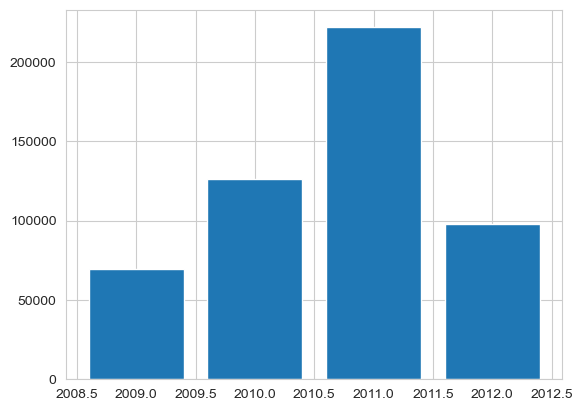

In [ ]:
# Plot the emissions against year
plt.bar(x=ny_emissions_arthur['Year'], height=ny_emissions_arthur['CO2 Mass (Tons)'])
plt.show()

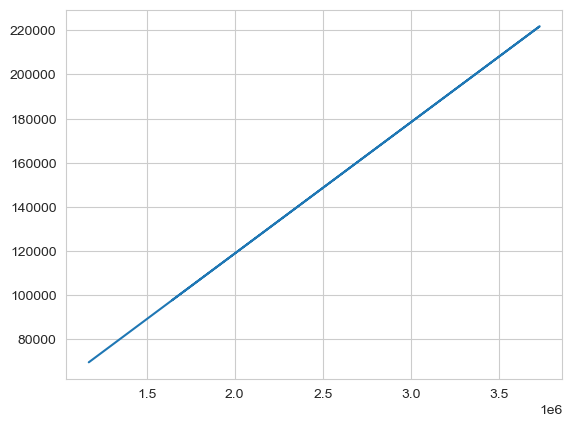

In [ ]:
# Plot CO2 emissions against heat input

plt.plot(ny_emissions_arthur['Heat Input (mmBtu)'], ny_emissions_arthur['CO2 Mass (Tons)'])